# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

- Forward pass
- Calculate the loss
- Zero gradients
- Perform backpropagation on the loss
- Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

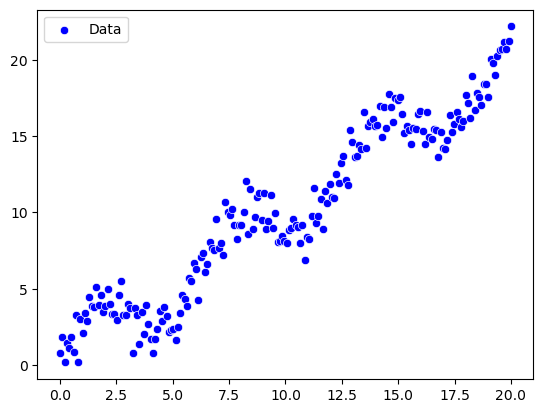

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [3]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [4]:
df = Simple1DRegressionDataset(X,y)


In [5]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [6]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[11.2994]])]

In [7]:
# construct the model using Linear block
in_features = 1
out_features = 1
#model_2 = nn.Linear(in_features,out_features)
model_2 = nn.Sequential(
    nn.Linear(in_features, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, out_features)
)

In [8]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [9]:
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)

/tmp/ipykernel_46372/20378063.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [11]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=20
                )

Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

129.13621520996094
129.36332906782627
156.85452283918858
169.85090173780918
268.64454187452793
282.8411952406168
425.16738237440586
522.814499989152
720.1664744764566
785.7971965223551
875.9909068495035
885.5884505659342
963.7091704756021
1202.265292301774
1403.8855163007975
1472.4888488203287
1562.9539290815592
1755.2634231001139
1795.321517124772
2023.2825766950846
2138.2737265974283
2327.8692771345377
2439.3969489485025
2525.5516654402018
2584.3345748335123
2829.2333632856607
3106.29912866652
3191.1050673872232
3260.220927372575
3333.6229201704264
3559.2169143110514
3567.2755261808634
3784.6935254484415
3803.5936414152384
3857.9439107328653
4112.692155972123
4112.718945462257
4116.577413517982
4347.979360539466
4404.48381992057
4521.4561862535775
4849.224954564124
5106.778329808265
5112.283201176673
5233.903287846595
5246.594772297889
5252.796259362251
5294.291799981147
5359.534239251167
5368.902476746589
5586.549159485847
5788.782954651862
5998.850688416511
6004.657420117408
6178.4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

243.50865173339844
250.05465841293335
367.9634108543396
514.6369643211365
537.4025893211365
547.5705943107605
742.7941966056824
911.6029734611511
1052.3972544670105
1062.5888438224792
1099.4967150688171
1271.2668566703796
1419.372874736786
1461.2985796928406
1681.9471545219421
1993.2132983207703
2284.942241191864
2338.1455492973328
2515.3688921928406
2533.875165462494
2839.455029964447
2939.296422481537
2954.79430437088
3051.8527760505676
3057.6483883857727
3061.2853467464447
3196.5777204036713
3369.1014478206635
3476.748168706894
3599.534347295761
3695.87828040123
3697.263449549675
3816.203245997429
3870.964766383171
4056.584837794304
4242.26312148571
4242.350183814764
4261.665018409491
4286.154791206121
4289.085293143988
4497.145977348089
4582.319118827581
4654.905186027288
4681.119926780462
4834.4263842999935
4853.361584037542
5180.8862727582455
5181.333801090717
5204.265514194965
5205.609352171421
5350.001365721226
5456.169044554234
5479.41991430521
5481.132187783718
5482.952329695

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.115007400512695
15.47278881072998
42.273348808288574
128.14440441131592
146.3705530166626
167.367262840271
195.0107011795044
203.39876461029053
221.29560565948486
342.4885606765747
364.4764223098755
375.96248626708984
416.07715225219727
418.26557540893555
515.8454780578613
548.2445487976074
558.8012819290161
800.5866212844849
900.224835395813
1019.7262697219849
1019.9270830750465
1031.9786558747292
1037.0876451134682
1078.666456758976
1088.7188249230385
1182.3730455040932
1182.373215646905
1291.0598916722956
1297.9235677434626
1344.302939386529
1444.9651937200251
1450.165204973382
1453.4442302896205
1463.5017511560145
1478.272721500558
1494.147646160287
1499.8651101304713
1623.450223655862
1718.867131920022
1735.8662621690455
1825.5377175523463
1827.0851775123301
1843.691104026002
1846.722278685731
1850.6019266559306
2072.147947163743
2078.1583226634684
2203.177129120988
2346.018254609269
2351.167366833848
2420.788269848985
2431.434010358018
2542.61008152501
2544.56453547017
2548.871

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

22.33794593811035
132.5866641998291
260.51077461242676
428.948579788208
437.55943775177
498.0210084915161
723.9628114700317
727.4384055137634
761.518792629242
775.1747336387634
835.8635001182556
907.9164252281189
1015.9245429039001
1025.244993686676
1040.3625388145447
1179.5660605430603
1194.5607171058655
1257.707796573639
1269.0934538841248
1273.7237000465393
1273.8124729841948
1349.224528953433
1444.230876609683
1536.7437550276518
1659.5551716536283
1724.3640171736479
1725.3621345609426
1790.9540992826223
1832.518518075347
1846.16851387918
1860.8521734327078
1874.8565155118704
1878.639531955123
1903.442016467452
1967.4696653932333
1996.4390581697226
2039.9206293672323
2060.126348361373
2060.2320801988244
2071.328456617892
2089.224426008761
2153.66837284714
2165.1785056367517
2165.269629329443
2182.044749110937
2184.4071260392666
2189.066922277212
2199.5542584359646
2221.437053769827
2261.926612943411
2262.5969791710377
2270.290095835924
2317.48189881444
2368.180404216051
2383.1736026

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

27.312639236450195
38.16286849975586
70.05573654174805
70.1299434453249
84.5232368260622
84.86245305836201
116.50076062977314
118.5727186948061
141.71111591160297
151.63255317509174
156.8364783078432
187.95056255161762
199.59297855198383
214.44375903904438
379.04951770603657
395.915778234601
400.8683615475893
421.91214092075825
543.1900645047426
576.5127917081118
584.9289856702089
632.828731611371
635.0421119481325
725.4454017430544
727.3905673772097
745.1495586186647
745.1496255411766
747.7705316557549
778.4377489103936
935.9199571623467
951.3224620833062
951.9645912065171
952.0663006543182
958.5883491276763
959.6783402203582
1000.6811058758758
1014.7810604809783
1068.7953655957244
1069.8663336276077
1089.2186781405471
1182.1968657015823
1193.5910955904983
1205.4995695590042
1205.724828147795
1215.5855859755538
1306.2505868910812
1321.6238664626144
1335.417816543486
1375.0215991972946
1435.4378170012496
1592.0904048918746
1596.6658867835067
1606.3343342780136
1649.3996953009628
1694.9

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

60.87961196899414
72.54690456390381
74.35140776634216
74.35339416353963
128.11684478609823
170.6751295456197
322.40933669894
332.7280432113912
435.1764150985982
435.79167748778127
476.35100747435354
479.34760094969533
479.6596726903226
479.67102868738584
480.4324670571368
517.3294587868731
517.4183255198877
517.6384581837337
523.8437160763424
525.0078037295025
564.7422855410259
568.0820849451702
573.6672146830242
574.5193309101742
635.4434489521664
642.0352119717281
650.503183773486
650.9956352326553
657.9696838471573
658.8152331325691
737.8489169094246
739.0324063512962
794.3507695409935
843.9232068273704
877.1413502905052
880.3515525076073
889.8784184667747
890.8804584953468
939.4477116081398
1009.2926975700539
1012.0920456859749
1043.6699818584602
1044.2088221523445
1108.3988245937508
1117.136054894654
1133.7416552517097
1137.4008306476753
1139.9570764515083
1154.6588987323921
1169.8083166095894
1190.8756917926949
1375.4970296833199
1415.3873800251167
1444.9989694568794
1477.1290391

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

51.324462890625
92.05249786376953
150.70109939575195
158.7885217666626
162.98586654663086
235.00841903686523
237.064297914505
238.03286403417587
238.82099735736847
262.97877514362335
305.20867931842804
333.21370899677277
363.67803966999054
368.1341372728348
398.4446612596512
436.5355006456375
453.68512642383575
501.7128211259842
512.8421365022659
512.9134174585342
546.0630451440811
580.0797611474991
582.1957787275314
603.1141442060471
608.854269862175
660.4614285230637
662.9473563432693
714.8973990678787
734.928673863411
737.6869715452194
761.5211981534958
769.1932476758957
820.1616047620773
829.0531529188156
832.5022567510605
855.2866328954697
916.3284267187119
916.4074950218201
934.1855177879333
959.9866366386414
988.6127638816833
1013.5894904136658
1016.3222789764404
1025.1109457015991
1138.2878408432007
1197.6658124923706
1198.4271293878555
1203.7216254472733
1204.2488763928413
1283.854024708271
1290.595126926899
1358.6530492901802
1358.8670451790094
1391.2247378975153
1429.0632121

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.196086883544922
32.711565017700195
53.88446807861328
66.33745288848877
66.39501038566232
69.25599852576852
217.94429198279977
273.86181822791696
317.5913523770869
345.38587180152535
372.89175406470895
414.0065077878535
445.591174993664
480.71332160010934
480.73793484829366
484.74190308712423
484.96004376374185
488.89201054535806
524.6270874496549
536.5605600830168
558.5582655426115
598.8537062164396
599.9457990881056
630.775179123506
630.8018063288182
653.3278645258397
665.938614724204
671.3900793772191
790.0587424021214
808.0841063242406
808.6803926806897
843.400496898219
848.1505326610059
851.3295120578259
871.2530083041638
896.10613864474
896.5905786734074
943.2958780508488
985.1150079946965
1036.806135771796
1076.1382280569524
1076.9300112705678
1079.4976079445332
1205.681041477248
1206.2701122742146
1210.8437440376729
1298.1449906807393
1312.2529170494527
1323.8839919548482
1339.4443881493062
1366.762161968276
1376.893223522231
1393.530689952895
1402.4454171638936
1449.351285694

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

48.126399993896484
53.31152629852295
62.7708044052124
64.36321270465851
83.64433491230011
134.37156116962433
146.40274250507355
147.39943027496338
151.45446586608887
157.39093589782715
159.92076230049133
174.86606335639954
184.7390673160553
185.90449810028076
196.57677268981934
200.6278533935547
209.22517776489258
241.71170806884766
245.85429906845093
283.41623067855835
289.1710891723633
292.7741005420685
292.94964687526226
320.9318894594908
360.51523296535015
379.0096482485533
451.04416362941265
459.10630314052105
475.5510014742613
476.5574391335249
490.5980608910322
505.97332315146923
507.647548481822
529.169894978404
530.2747477740049
535.2371243685484
547.6885546892881
561.1662902086973
573.9998749941587
582.2106560915709
593.6428584307432
620.7652892321348
622.2827210873365
627.9543509930372
637.0929885357618
649.2608638256788
650.2938927859068
655.8453745096922
663.0948490351439
695.6848453730345
754.0804294794798
754.0812047385843
782.8205960654886
789.7933505439432
807.31074747

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.671439170837402
10.08467149734497
11.76769244670868
11.84991367906332
11.899131383746862
16.638619508594275
16.93729343637824
31.931717302650213
32.937940146774054
56.911471869796515
60.72106912359595
71.05573728308082
71.18211769685149
85.8516676388681
92.95769524201751
96.81203150376678
117.98832201585174
118.0877499319613
129.50966212525964
139.4144739843905
147.37763354554772
150.56911513581872
167.93715140596032
168.59147504344583
168.60933872126043
171.30197187326849
178.30228801630437
191.004513701424
191.04064689017832
195.47197089530528
198.35973010398448
198.41740096919239
199.33433230035007
210.96252901665866
212.64957018010318
212.8576974403113
213.28027443401515
217.54128841869533
217.9394175838679
221.2696475815028
229.820905668661
246.822858793661
255.74075220339
274.8401479553431
284.9078140091151
284.9138718638569
295.40916548110545
308.5867444071919
320.5592289958149
321.12337956763804
329.53952393867075
330.7577780280262
331.2233134005219
331.34242085553706
339.585

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

11.10287094116211
11.323388800024986
14.7681352943182
25.142059549689293
33.35037635266781
73.52184699475765
101.84778045117855
124.21971915662289
143.20660804212093
144.75434289872646
147.98992739617825
150.38833080232143
150.5988197773695
156.90872006118298
161.127168700099
165.88446526229382
174.59569363296032
175.01672403514385
175.62104259431362
191.39253269135952
191.4150098375976
195.78655515238643
195.8043020106852
195.80642514582723
199.535461477004
200.28973507042974
200.3640916859731
201.65606289263815
210.10461407061666
216.46671133395284
224.23417978640646
224.5596126532182
236.382209203206
251.1919893240556
267.2929166769609
268.42344882246107
269.0019286489114
271.4646242475137
284.2884062146768
284.4268304621801
286.1177696501836
294.0969280516729
298.2116884505376
299.8118854081258
302.80037050601095
304.76531796809286
305.1804422950372
312.54523797985166
312.68142851348966
312.68652670131996
313.2470800136216
313.2534983251244
315.6613440606743
319.74805928207934
325.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0567522794008255
4.483849599957466
7.520974472165108
7.727285787463188
9.979715511202812
16.87690608203411
17.860706374049187
23.076139971613884
23.13370507583022
24.036405857652426
24.684020694345236
24.688017345033586
27.4662861591205
33.01042268332094
33.67784062679857
38.58337346371263
38.657728782854974
41.65216170903295
47.37917052861303
50.15813051816076
52.68289457913488
57.490900865755975
80.24782644864172
82.70576202031225
96.781797519885
97.98653375264257
107.5868831789121
110.93124519940466
123.34460007306188
129.4098995840177
133.71272122021765
139.7658098852262
143.96351420041174
146.19322334881872
146.623755983077
148.45554106589407
148.4558294568851
150.35710866792942
155.9960284982517
158.68176157816197
161.02418859346653
161.68552626713063
162.28088660581852
180.53936477049137
180.56424882120336
181.01708199686254
182.63608588880743
184.29961743063177
202.25090946859564
206.1838897675916
206.8053646296903
211.56894495195593
211.76111382848467
217.7686283052608
217.7

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.925645649433136
1.1919673681259155
1.8556943535804749
2.353173851966858
6.337008357048035
33.66152083873749
36.8029865026474
57.77399671077728
57.78908612392843
59.501483818516135
61.892745634540915
67.04265179298818
68.26658918522298
68.32132988609374
69.80459933914244
72.23946982063353
73.2990278545767
84.11980956234038
84.19193323142827
90.87015064246953
90.96920062042773
104.40225745178759
140.1632094476372
146.9970283601433
149.52069998718798
149.661500999704
150.67792076803744
150.7135729957372
150.77975268103182
154.11282105185091
154.95247359015048
161.29130692221224
172.69855255819857
191.0797857735306
199.77926296927035
204.01899428106844
205.01736892201006
207.21501005627215
209.1104033086449
209.41583425737917
209.75122020579875
210.84701321460307
215.2964117322117
236.26833937503397
239.49300740100443
239.71878137625754
247.089867496863
247.60415753163397
262.02589234150946
263.3463961724192
263.97775390185416
264.2906714025885
264.2976496904157
264.51059336354956
265.96

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.250890731811523
9.713445514440536
10.102339148521423
12.68307912349701
16.81683099269867
17.00557792186737
17.80897831916809
19.631675004959106
30.1972496509552
32.34789228439331
33.19169211387634
35.16337561607361
40.190202951431274
42.259305238723755
42.34186960756779
43.991119399666786
46.50225020945072
52.961753860116005
60.07835580408573
61.898113027215004
63.216634050011635
66.4929514080286
66.8652301877737
66.96406477689743
67.4449773132801
71.29558113217354
72.88381138443947
73.56156733632088
73.9088942706585
74.0944619178772
74.15044313296676
74.23674665018916
75.35655174776912
75.36242765001953
78.36157649569213
86.01698010973632
86.70618635229766
91.53576761297882
95.82389455847442
105.15403753332794
107.35118800215423
107.6133679728955
111.7089137416333
112.73883360438049
117.3023020606488
121.45280045084655
128.1262914519757
128.35430130176246
132.9087818544358
132.92419656645507
134.10841437708586
145.07068606745452
149.319062913768
177.51544162165374
200.40200969111174

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.5810033082962036
5.109658122062683
5.6377604603767395
5.675112821161747
10.191481687128544
12.797171451151371
19.15058884769678
19.157607505097985
20.6897448990494
26.661977717652917
27.775943825021386
33.47765643335879
55.80529505945742
58.03699333406985
61.43867594935
80.44462306238711
82.64409382082522
90.05487377382815
97.33951790072024
99.52424628473818
104.9460378382355
107.11686713434756
108.20064348913729
108.50219506956637
132.0696312878281
137.71776933409274
141.92424268461764
145.72049231268466
145.72816970571876
148.47395327314734
150.63050463423133
170.71498491987586
170.7868838943541
173.29600531235337
174.7590509094298
197.55312973633409
230.7583184875548
232.71172470226884
235.86185402050614
235.8712212778628
236.2506257928908
237.74220914021134
242.9310318864882
257.6724516786635
259.0287939943373
259.5286453701556
259.62277154251933
263.7048786096275
269.8910935334861
280.16244534775615
282.420480530709
286.72061709687114
292.16042355820537
302.6387379579246
309.675

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6507045030593872
10.97190010547638
11.572190463542938
11.580241470597684
11.582173520349897
15.0982491314644
18.257830554270186
20.712845498346724
27.247940236353315
27.391538733267225
28.61970316770021
29.535778754972853
30.40015833976213
41.26893275382463
44.71105306746904
46.03792291285936
47.47318618895952
48.198154026293196
49.596629196428694
54.709697777056135
59.97054391505662
62.86442905070726
63.15482571127359
66.79073479177896
72.35203220846597
74.83048202993814
75.84411468508188
84.19674053194467
115.07876148226205
119.71389093401376
122.88309040071908
125.11483707430307
125.12021984357852
125.40259437460918
135.49648075003643
139.21206693549175
139.25529610563535
140.3500176613452
140.37439210352022
142.4376109355362
145.94689447816927
146.44917983945925
148.51347536977846
153.84780402120668
157.3863975518616
159.17869729932863
159.21586116042454
166.36458571639378
166.76602287974674
188.93517227855045
203.06689377513248
204.85038967814762
206.2563272305997
229.7808156796

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1983015239238739
3.1121496856212616
3.6233206689357758
6.088003247976303
13.007592767477036
13.862639516592026
18.769558042287827
29.58855065703392
31.62206920981407
35.693367809057236
36.1784625351429
45.42369702458382
47.45708420872688
49.97608354687691
51.228653222322464
51.72271081805229
52.24846914410591
56.05193164944649
56.08120299130678
56.37359223514795
60.02058420330286
98.22198114544153
99.92072091251612
106.0868519321084
106.10099919326603
106.43355374224484
107.47519819624722
108.15333734638989
118.61266790516675
118.6139205021318
124.67875938839279
125.20032589859329
125.23356956592761
128.394971791422
128.59608097723685
128.8034028147813
129.81255987635814
129.88453711918555
130.8756420200225
131.77139474800788
139.16746570519172
141.49490501335822
141.53775392076932
143.49960384867154
159.12090549967252
159.3971492757555
163.32624788186513
165.06904740235768
165.7884321322199
171.41065789363347
171.99840129516087
177.85267842910253
178.59582025907002
179.1583231200929

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.021019048988819122
0.21639182418584824
2.0532453283667564
15.202161572873592
15.203738612006418
17.805943411658518
18.230097156832926
30.582113605807535
31.570558112929575
34.12959818250965
34.50558720238041
45.04557285911869
48.10934816009831
53.14125285751652
57.33791814453434
61.37807641632389
62.16866187460255
74.08073405630421
74.45826993591618
86.6726206362946
87.15811033255886
91.99304599768948
99.81838865287136
111.01901121146511
119.28332586295437
119.30602474033367
120.48285145580303
126.06385750591289
140.55243916332256
141.60237283527385
141.77939348935615
142.87168973207008
146.22753732919227
150.9524647545768
152.8564729046775
158.8210543942405
160.4603205275489
167.57441907643806
169.12167030095588
172.10362034558784
172.12235776416492
181.05851022235584
181.76042828790378
185.5370517753763
185.612126559834
194.11451837501954
203.81316778145265
208.96344634972047
218.77163383446168
220.13164886913728
220.13791075523477
220.29941466625314
231.6290769892512
234.704372675

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4105597138404846
0.5526785403490067
2.7035924941301346
3.173002317547798
3.963598981499672
5.3767556101083755
6.017875626683235
6.099542945623398
9.88842687010765
15.089648336172104
15.756898015737534
15.764445606153458
26.865327182691544
27.724794212263077
51.35704595176503
54.272287908475846
71.40752464858815
73.30252665607259
74.95960563747212
78.71658248035237
78.76792482240126
78.79065532190725
79.73097080690786
92.72633213503286
94.23178214533255
110.64982909662649
111.84762687189505
115.93940658075735
118.26167196733877
122.05666560633108
124.39048165781423
136.46905202372
139.36556524736807
139.79136402113363
140.8288273285143
140.8393215504475
141.77227782877162
141.7728027459816
144.16135755745927
145.2618621942238
145.26204843049345
145.4167408717185
159.40621516828833
164.7997574580222
166.196674443534
166.31347412591276
168.21555358891783
171.85627228741942
172.65693963294325
174.94958008055983
176.05743623500166
176.60271794324217
176.86964044695196
179.05250558977423
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.06264301389455795
0.5123204216361046
1.0088855251669884
5.014292858541012
5.351584993302822
15.220982156693935
15.520794413983822
21.992510341107845
23.86030926555395
30.508621357381344
31.48194619268179
31.51489517837763
31.565501041710377
36.42626840621233
37.88336092978716
38.755301900207996
44.01908630877733
45.99768502265215
60.56654316931963
61.839426942169666
61.97326233237982
76.26057197898626
101.9304557070136
109.0322385057807
118.87282230705023
126.13260748237371
126.13475169613957
131.55453147366643
138.13252152875066
140.0019878335297
148.129731554538
151.1588210053742
153.1425742097199
153.1640598308295
153.4383162688464
154.3384763430804
155.10896144621074
160.28547845594585
160.3132886942476
164.14861083589494
165.92445552907884
165.9292536494322
166.33819029899314
166.3849372197874
166.62371636228636
166.76087928609923
167.13961208658293
169.5928970654495
172.87692297296599
173.53164321975783
173.57267703535035
174.81806959630921
174.91764355869964
179.72666169377044

<Axes: >

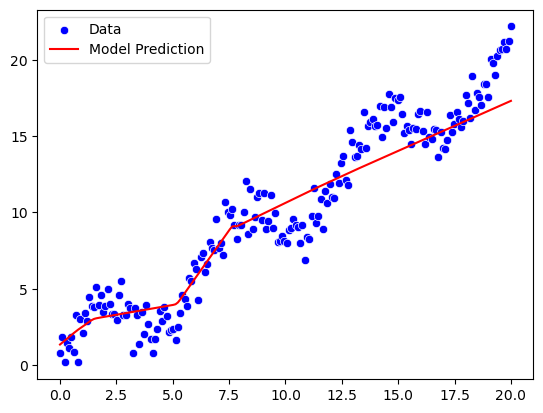

In [12]:
# model 
model_2.to('cuda')
model_2.eval()  
X_test = torch.tensor(X, dtype=torch.float32).reshape(-1,1).to('cuda')
y_test = model_2(X_test).cpu().detach().numpy()

sns.scatterplot(x=X,y=y,color='Blue', label='Data')
sns.lineplot(x=X_test.cpu().numpy().ravel(), y=y_test.ravel(), color='Red', label='Model Prediction')